In [292]:
import numpy as np
import pandas as pd

In [293]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.14.0


In [294]:
dataset = pd.read_csv('ion_.csv')

In [295]:
dataset.head()

,E QSPR,S QSPR,A QSPR,B QSPR,V,L QSPR,MW,Ncharges,C,N,...,RCHO,RCOR,RCOOH,RCOOR,ROR,RCCH,RCN,RINGS,AROMATIC,log RRF
0,0.41,1.05,0.74,1.00,0.7055,3.110,82.0376,0,3,1,...,0,0,1,0,0,0,0,0,0,-3.298432
1,0.35,0.89,0.73,1.00,0.7055,2.966,82.0376,0,3,1,...,0,0,1,0,0,0,0,0,0,-3.225483
2,0.35,1.05,0.74,1.00,0.8464,3.583,94.0483,0,4,1,...,0,0,1,0,0,0,0,0,0,-3.044312
3,0.95,1.09,0.63,1.24,0.9179,4.987,102.0736,0,5,3,...,0,0,0,0,0,0,0,1,1,-2.954677
4,1.78,1.61,1.19,1.32,0.9816,7.180,106.0623,0,4,3,...,0,0,0,0,0,0,0,1,1,-2.950782


In [296]:
X = dataset.iloc[:, 0:27].values
y = dataset.iloc[:, 27].values

In [297]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [298]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [299]:
def build_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.AdamOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 27)                0         
_________________________________________________________________
dense_324 (Dense)            (None, 100)               2800      
_________________________________________________________________
dense_325 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_326 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_327 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_328 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_329 (Dense)            (None, 100)             

In [300]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

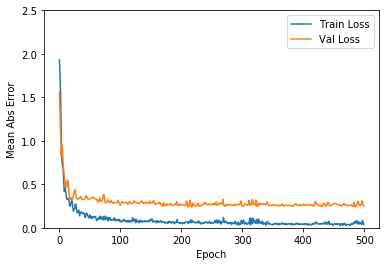

In [301]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val Loss')
  plt.legend()
  plt.ylim([0, 2.5])

plot_history(history)
plt.show()

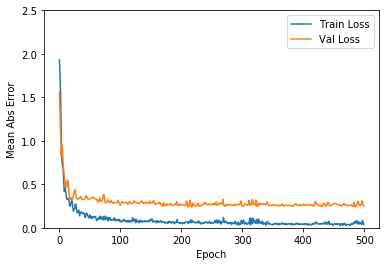

In [302]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.legend()
plt.ylim([0, 2.5])
plt.show()
fig.savefig('train_val_500.png', dpi=400)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................

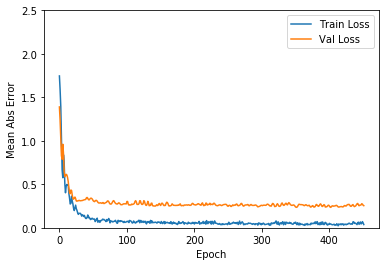

In [303]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

#plot_history(history)
#plt.show()

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.legend()
plt.ylim([0, 2.5])
plt.show()
fig.savefig('train_val_100.png', dpi=400)

In [304]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae * 1))

Testing set Mean Abs Error:    0.20


In [305]:
[loss, mae] = model.evaluate(X_train, y_train, verbose=0)

print("Training set Mean Abs Error: {:7.2f}".format(mae * 1))

Training set Mean Abs Error:    0.07


In [306]:
from sklearn import metrics

y_pred = model.predict(X_train).flatten()

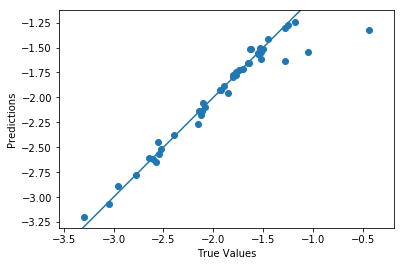

In [307]:
plt.scatter(y_train, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

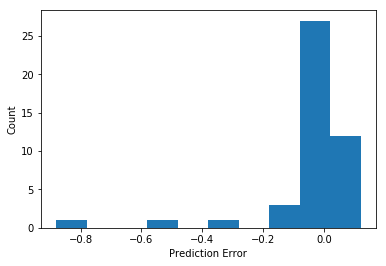

In [308]:
error = y_pred - y_train
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [309]:
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_train,})
print(df)

    predicted_values  true_values
0          -1.540046    -1.525784
1          -1.922986    -1.935542
2          -2.563904    -2.542118
3          -1.557421    -1.533132
4          -1.652415    -1.645892
5          -1.929541    -1.924453
6          -2.782026    -2.774691
7          -1.504552    -1.531653
8          -2.054909    -2.107349
9          -1.510887    -1.497573
10         -1.722181    -1.747147
11         -2.135643    -2.143876
12         -1.615358    -1.525784
13         -1.774385    -1.774691
14         -1.713213    -1.703335
15         -2.379157    -2.391474
16         -1.799204    -1.806875
17         -1.414613    -1.449772
18         -2.614720    -2.602060
19         -1.270776    -1.253366
20         -2.520853    -2.527244
21         -1.779303    -1.804100
22         -1.748263    -1.772113
23         -2.099775    -2.079877
24         -1.656216    -1.647817
25         -2.135764    -2.115771
26         -2.609940    -2.640165
27         -2.883496    -2.950782
28         -1.

In [310]:
df.to_csv('ANN_plus_tr_5.csv')

In [69]:
y_pred = model.predict(X_test).flatten()

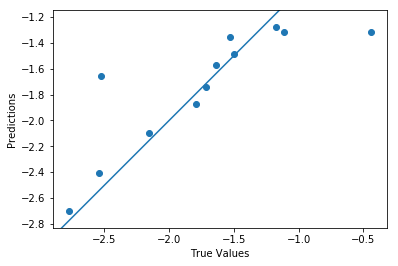

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

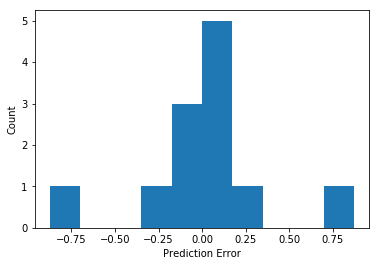

In [71]:
error = y_pred - y_test
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [72]:
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_test,})
print(df)

    predicted_values  true_values
0          -1.277854    -1.176526
1          -2.701715    -2.774691
2          -2.405984    -2.542118
3          -1.353635    -1.531653
4          -1.313703    -1.109020
5          -1.745172    -1.718967
6          -2.093722    -2.153045
7          -1.313597    -0.440093
8          -1.484383    -1.497573
9          -1.655076    -2.527244
10         -1.573808    -1.634512
11         -1.872409    -1.793174


In [73]:
df.to_csv('ANN_ts_1.csv')